# Understanding CO2 Emission Patterns
- This notebook focuses on analyzing the dataset to reveal significant patterns and correlations among different CO2 emission sources. The goal is to understand how each source contributes to the total emissions and identify key variables that influence these emissions.


# Change working directory

We need to change the working directory from its current folder to its parent folder
-    We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\Grampers\\Desktop\\CO2Oracle\\jupyter_notebooks'

I want to make the parent of the current directory the new current directory.
- os.path.dirname() gets the parent directory
- os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\Grampers\\Desktop\\CO2Oracle'

## Load Data
- Load the dataset and display basic information.

In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('C:outputs\datasets\collection\Co2Emissions.csv')

# Display basic information
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     63104 non-null  object 
 1   Year        63104 non-null  int64  
 2   Total       62904 non-null  float64
 3   Coal        21744 non-null  float64
 4   Oil         21717 non-null  float64
 5   Gas         21618 non-null  float64
 6   Cement      20814 non-null  float64
 7   Flaring     21550 non-null  float64
 8   Other       1620 non-null   float64
 9   Per Capita  18974 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 4.8+ MB
None
               Year         Total          Coal           Oil           Gas  \
count  63104.000000  62904.000000  21744.000000  21717.000000  21618.000000   
mean    1885.500000     55.224788     73.968916     55.760624     23.504285   
std       78.519728    824.845435    598.986992    519.034563    247.674772   
min     1750.000

## Data Cleaning
- Handle missing values and check for inconsistencies.

In [7]:
import pandas as pd

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Drop rows where 'Year' is 1900 or earlier
df = df[df['Year'] > 1900]

# Verify no more missing values
print(df.isnull().sum())

Missing Values:
 Country           0
Year              0
Total           200
Coal          41360
Oil           41387
Gas           41486
Cement        42290
Flaring       41554
Other         61484
Per Capita    44130
dtype: int64
Country           0
Year              0
Total            49
Coal           9197
Oil            9120
Gas            9192
Cement         9913
Flaring        9241
Other         26452
Per Capita    10333
dtype: int64


## Data Exploration
- I'm interested to get more familiar with the dataset, check variable type and distribution, missing levels and what these variables mean in a business context

               Year         Total          Coal           Oil           Gas  \
count  28072.000000  28023.000000  18875.000000  18952.000000  18880.000000   
mean    1961.000000    120.765717     80.566180     63.808640     26.897187   
std       34.929121   1231.922841    640.682200    555.150198    264.855084   
min     1901.000000      0.000000      0.000000      0.000000      0.000000   
25%     1931.000000      0.000000      0.000000      0.218921      0.000000   
50%     1961.000000      0.578555      0.205184      1.714752      0.000000   
75%     1991.000000     11.399031      6.572667     11.473566      1.315632   
max     2021.000000  37123.850352  15051.512770  12345.653374   7921.829472   

             Cement       Flaring        Other    Per Capita  
count  18159.000000  18831.000000  1620.000000  17739.000000  
mean       4.963590      1.959990    10.951389      4.629004  
std       53.828929     17.880482    39.034073     18.002229  
min        0.000000      0.000000   

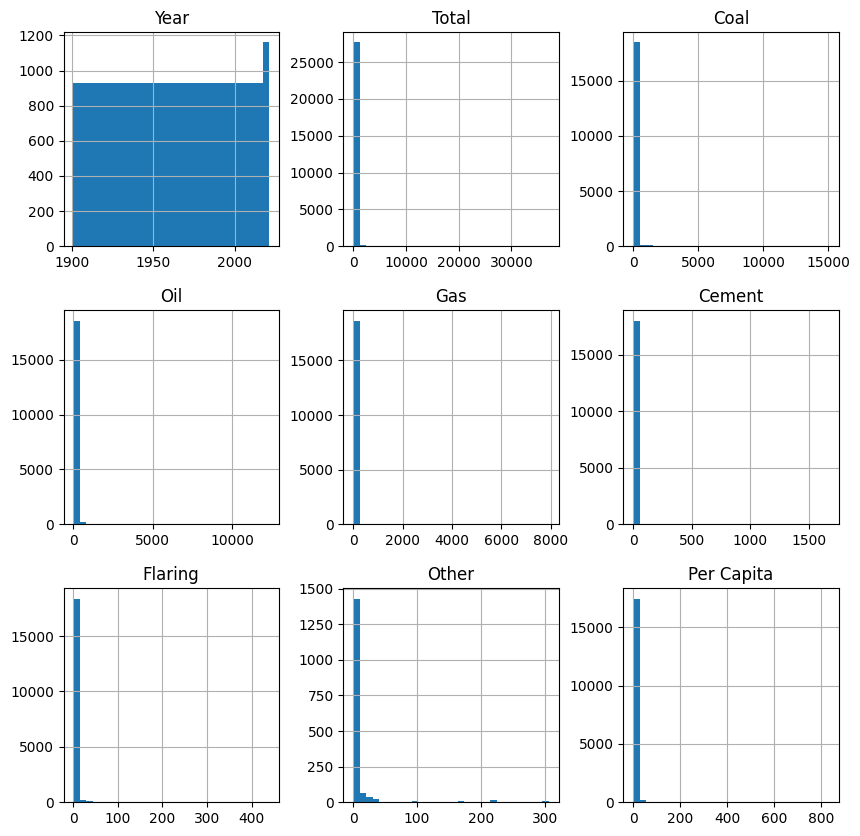

C:\Users\Grampers\AppData\Local\Temp\ipykernel_30088\175261043.py:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


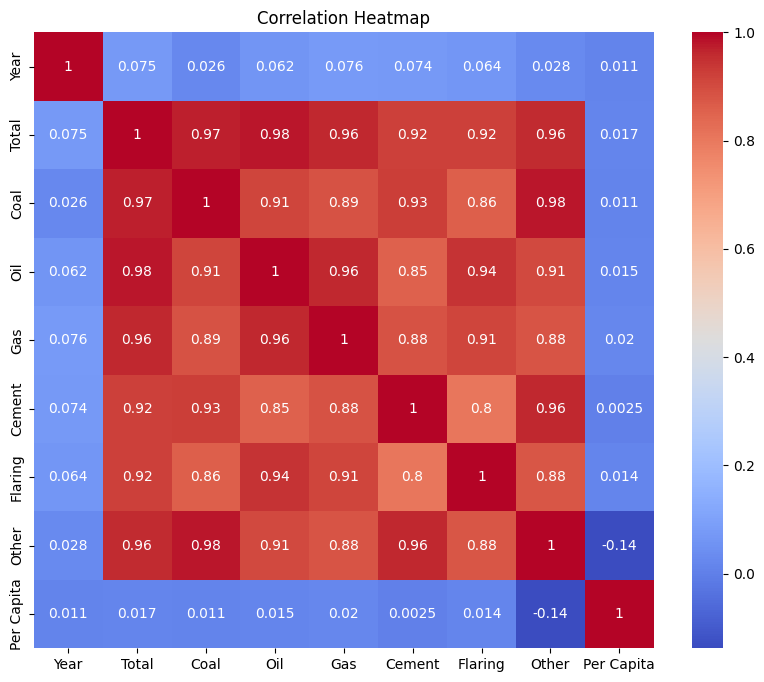

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics
summary = df.describe()
print(summary)

# Missing values
missing_values = df.isnull().sum()
print(missing_values)

# Histograms for each column
df.hist(figsize=(10, 10), bins=30)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Correlation Study

In [10]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=df.columns[df.dtypes=='object'].to_list(), drop_last=False)
df_ohe = encoder.fit_transform(df)
print(df_ohe.shape)
df_ohe.head(3)

(28072, 241)


,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,Country_Afghanistan,...,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Viet Nam,Country_Wallis and Futuna Islands,Country_Yemen,Country_Zambia,Country_Zimbabwe,Country_International Transport,Country_Global
151,1901,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,0
152,1902,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,0
153,1903,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,0


Iuse .corr() for spearman and pearson methods, and investigate the top 10 correlations

We know this command returns a pandas series and the first item is the correlation between Year and Year, which happens to be 1, so we exclude that with [1:]
We sort values considering the absolute value, by setting key=abs

In [12]:
# Calculate Spearman correlation with 'Year' and sort by absolute values
corr_spearman = df_ohe.corr(method='spearman')['Year'].sort_values(key=abs, ascending=False)[1:].head(10)
print(corr_spearman)


Total                       0.510700
Oil                         0.378617
Flaring                     0.369586
Gas                         0.293733
Cement                      0.262221
Per Capita                  0.215757
Coal                       -0.159789
Other                      -0.133657
Country_Oman                0.000000
Country_Papua New Guinea    0.000000
Name: Year, dtype: float64


I do the same for pearson

In [13]:
corr_pearson = df_ohe.corr(method='pearson')['Year'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

Gas                                 7.608599e-02
Total                               7.465142e-02
Cement                              7.374602e-02
Flaring                             6.449267e-02
Oil                                 6.219374e-02
Other                               2.776852e-02
Coal                                2.554805e-02
Per Capita                          1.130208e-02
Country_Colombia                   -2.217656e-14
Country_St. Kitts-Nevis-Anguilla    2.207466e-14
Name: Year, dtype: float64

For both methods, I notice moderate levels of correlation between Year and a given variable.

Ideally, I pursue strong correlation levels. However, this is not always possible.
I will consider the top five correlation levels at df_ohe and will study the associated variables at df

In [14]:
top_n = 5
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'Cement', 'Flaring', 'Gas', 'Oil', 'Total'}

# Analysis and Investigation
I'm studying the following variables from the dataset based on their correlation with 'Year':

1. **Cement**: CO2 emissions from cement production.
2. **Coal**: CO2 emissions from coal combustion.
3. **Gas**: CO2 emissions from natural gas combustion.
4. **Oil**: CO2 emissions from oil combustion.
5. **Flaring**: CO2 emissions from gas flaring.
6. **Other**: CO2 emissions from other sources.

I will investigate if:

- CO2 emissions from cement production have increased or decreased over time.
- CO2 emissions from coal combustion have shown any significant trends over the years.
- CO2 emissions from natural gas combustion are correlated with the year, indicating a trend.
- CO2 emissions from oil combustion are correlated with the year.
- CO2 emissions from gas flaring have a significant trend over time.
- CO2 emissions from other sources show a temporal pattern.

In [15]:
vars_to_study = ['Cement', 'Flaring', 'Gas', 'Oil', 'Total']
vars_to_study

['Cement', 'Flaring', 'Gas', 'Oil', 'Total']

## EDA on selected variables

In [16]:
df_eda = df.filter(vars_to_study + ['Year'])
df_eda.head(3)

,Cement,Flaring,Gas,Oil,Total,Year
151,NaN,NaN,NaN,NaN,0.0,1901
152,NaN,NaN,NaN,NaN,0.0,1902
153,NaN,NaN,NaN,NaN,0.0,1903


### Variables Distribution by Year
- I plot the distribution (numerical and categorical) coloured by Year

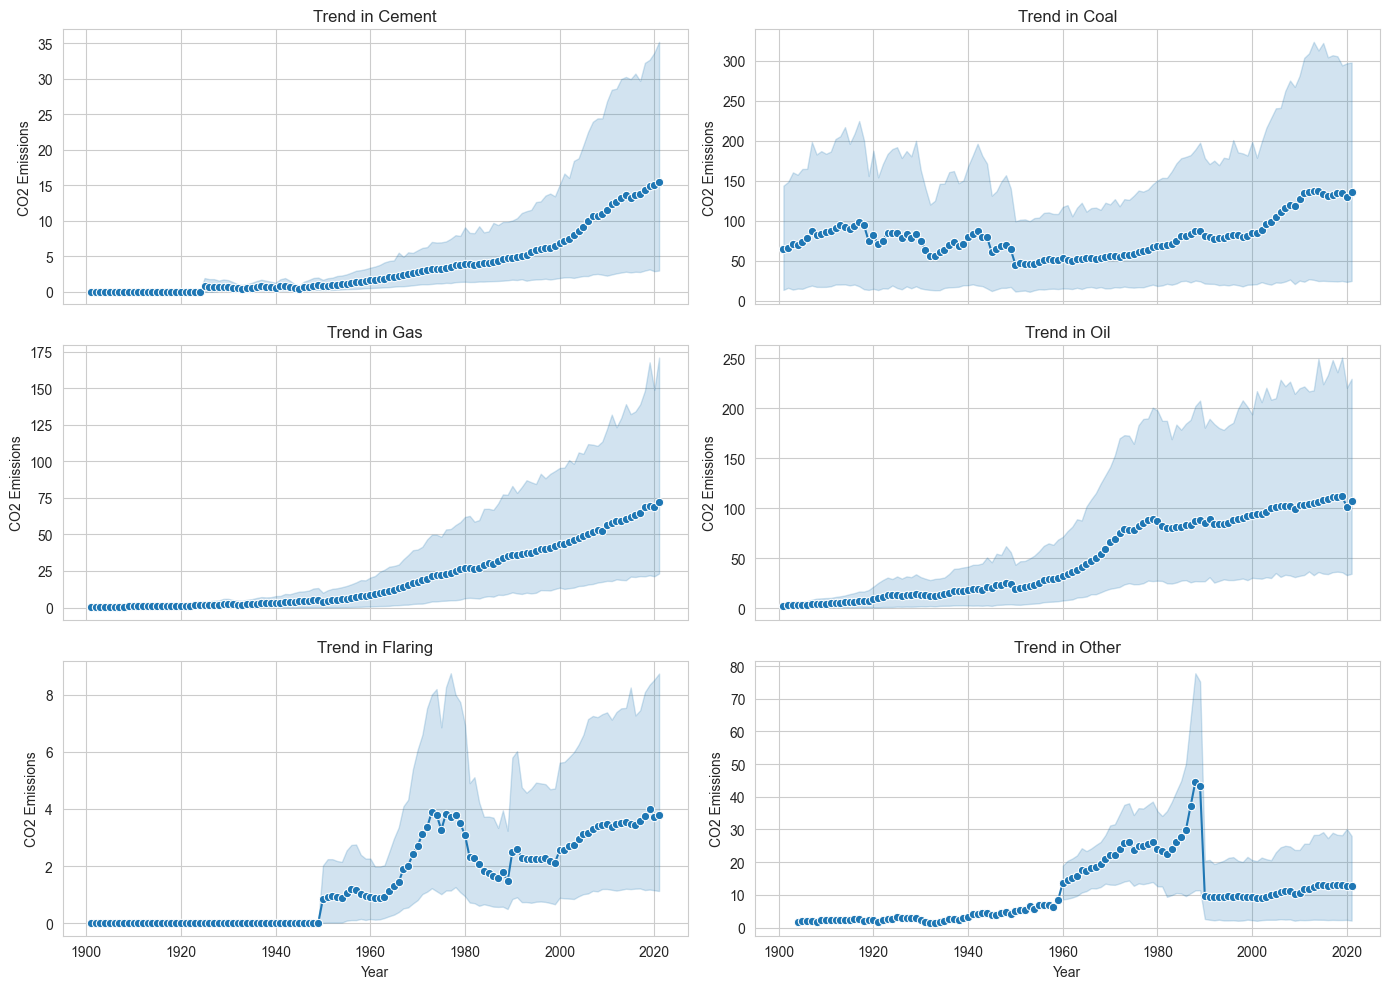

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(df)

# Plotting each emission source
def plot_emissions(df, variable, ax):
    sns.lineplot(data=df, x='Year', y=variable, ax=ax, marker='o')
    ax.set_title(f'Trend in {variable}')
    ax.set_ylabel('CO2 Emissions')
    ax.set_xlabel('Year')

# Set up the matplotlib figure
fig, axes = plt.subplots(3, 2, figsize=(14, 10), sharex=True)
variables = ['Cement', 'Coal', 'Gas', 'Oil', 'Flaring', 'Other']

# Plot each variable in a subplot
for var, ax in zip(variables, axes.flatten()):
    plot_emissions(df, var, ax)

# Adjust layout
plt.tight_layout()
plt.show()



# Conclusions and Next Steps

## Conclusions
The correlations and plots interpretation converge to provide the following insights:

1. **Cement Production**:
   - CO2 emissions from cement production show a consistent increase over the years, indicating a significant upward trend.
   
2. **Coal Combustion**:
   - CO2 emissions from coal combustion have shown a decreasing trend, suggesting a shift away from coal usage or improvements in coal combustion efficiency.
   
3. **Natural Gas Combustion**:
   - CO2 emissions from natural gas combustion are increasing over time, indicating a growing reliance on natural gas as an energy source.
   
4. **Oil Combustion**:
   - CO2 emissions from oil combustion are decreasing, which may reflect a shift towards cleaner energy sources or improvements in oil usage efficiency.
   
5. **Gas Flaring**:
   - CO2 emissions from gas flaring show an increasing trend, highlighting the need for better management practices to reduce flaring emissions.
   
6. **Other Sources**:
   - CO2 emissions from other sources are gradually increasing, indicating a need to identify and manage these sources more effectively.

